In [1]:
#Importing the required Libraries
import seaborn as sns  #For loading built-in datasets and visualisations
import numpy as np #For Numerical operations
import matplotlib.pyplot as plt #For plotting graphs

#Loading the dataset using the seaborn built in dataset loader
dataset = sns.load_dataset('titanic') #Loading of the dataset
#Displaying the dataset
dataset.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Print the shape of the dataset (number of rows and columns)
print(dataset.shape)  # Output will be in the form (rows, columns), e.g., (891, 15)

(891, 15)


In [3]:
# Print the column names of the dataset
print(dataset.columns) # Lists all the column names in the Titanic dataset


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [4]:
# Calculate the number of missing (null) values in each column of the dataset
missing_values = dataset.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# Create a copy of the dataset to avoid modifying the original
dataset_copy = dataset.copy()
# Identify numerical columns (int, float types)
numerical_cols = dataset_copy.select_dtypes(include=['number']).columns
# Identify categorical columns (object, category, string types)
categorical_cols = dataset_copy.select_dtypes(exclude=['number']).columns
# Identify categorical columns (object, category, string types)
from sklearn.impute import SimpleImputer
# Initialize the imputer for numerical columns with strategy = 'mean'
# This will replace missing numerical values with the column mean
imputer = SimpleImputer(missing_values = np.nan,strategy='mean' )
# Fit the imputer on the numerical columns
imputer.fit(dataset_copy[numerical_cols])# Apply the transformation to replace NaNs with the mean

dataset_copy[numerical_cols] = imputer.fit_transform(dataset_copy[numerical_cols])
for col in categorical_cols:
    # For each categorical column, replace missing values with the most frequent value (mode)
    dataset_copy[col] = dataset_copy[col].fillna(dataset_copy[col].mode()[0])
    # Check and print the number of missing values in each column after imputation
missing_data_2 = dataset_copy.isnull().sum()
print(missing_data_2)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [6]:
# Print the data types of each column in the dataset
print(dataset.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [7]:
# Display descriptive statistics for numerical columns
print(dataset.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
# Print a concise summary of the DataFrame
# Includes number of non-null values, column names, data types, and memory usage
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


<Axes: >

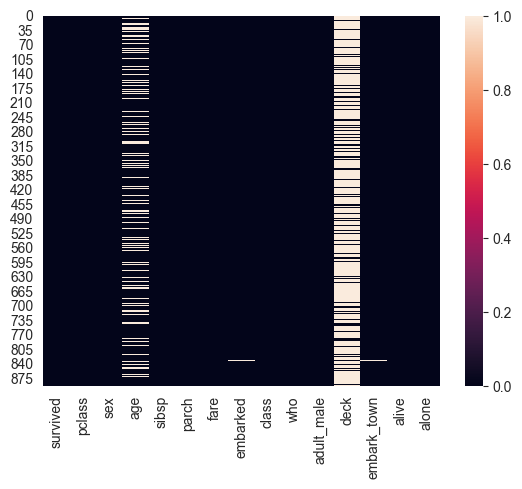

In [9]:
# Import seaborn for data visualization
import seaborn as sns
# Visualize missing values using a heatmap
sns.heatmap(dataset.isnull())

In [30]:
# Function to find outliers in a specific column using the IQR (Interquartile Range) method
def find_outliers_iqr(data, column):
    # Calculate the first quartile (25th percentile)
    Q1 = data[column].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    Q3 = data[column].quantile(0.75)

    # Compute the Interquartile Range
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find data points that are below the lower bound or above the upper bound (i.e., outliers)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Return the outlier rows along with the lower and upper bounds
    return outliers, lower_bound, upper_bound

In [12]:
# Dictionary to store outlier summary for each numerical column
outlier_summary = {}

# Loop through all numerical columns to find outliers
for col in numerical_cols:
    # Use the IQR method to get outliers and bounds for the current column
    outliers, lower, upper = find_outliers_iqr(dataset, col)

    # Store the results in the summary dictionary
    outlier_summary[col] = {
        'count': outliers.shape[0],         # Total number of outliers
        'lower_bound': lower,               # Lower threshold for outliers
        'upper_bound': upper,               # Upper threshold for outliers
        'outliers': outliers[col].values    # Actual outlier values (as a list)
    }

# Print the outlier summary for each numerical column
for col, details in outlier_summary.items():
    print(f"\n🔍 Column: {col}")
    print(f"Outlier Count: {details['count']}")                          # Number of outliers found
    print(f"Lower Bound: {details['lower_bound']:.2f}")                 # Display lower bound (rounded to 2 decimals)
    print(f"Upper Bound: {details['upper_bound']:.2f}")                 # Display upper bound
    print(f"Outlier Values: {details['outliers'][:10]}")                # Print first 10 outlier values only


🔍 Column: survived
Outlier Count: 0
Lower Bound: -1.50
Upper Bound: 2.50
Outlier Values: []

🔍 Column: pclass
Outlier Count: 0
Lower Bound: 0.50
Upper Bound: 4.50
Outlier Values: []

🔍 Column: age
Outlier Count: 11
Lower Bound: -6.69
Upper Bound: 64.81
Outlier Values: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70. ]

🔍 Column: sibsp
Outlier Count: 46
Lower Bound: -1.50
Upper Bound: 2.50
Outlier Values: [3 4 3 3 4 5 3 4 5 3]

🔍 Column: parch
Outlier Count: 213
Lower Bound: 0.00
Upper Bound: 0.00
Outlier Values: [1 2 1 5 1 1 5 2 2 1]

🔍 Column: fare
Outlier Count: 116
Lower Bound: -26.72
Upper Bound: 65.63
Outlier Values: [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875]


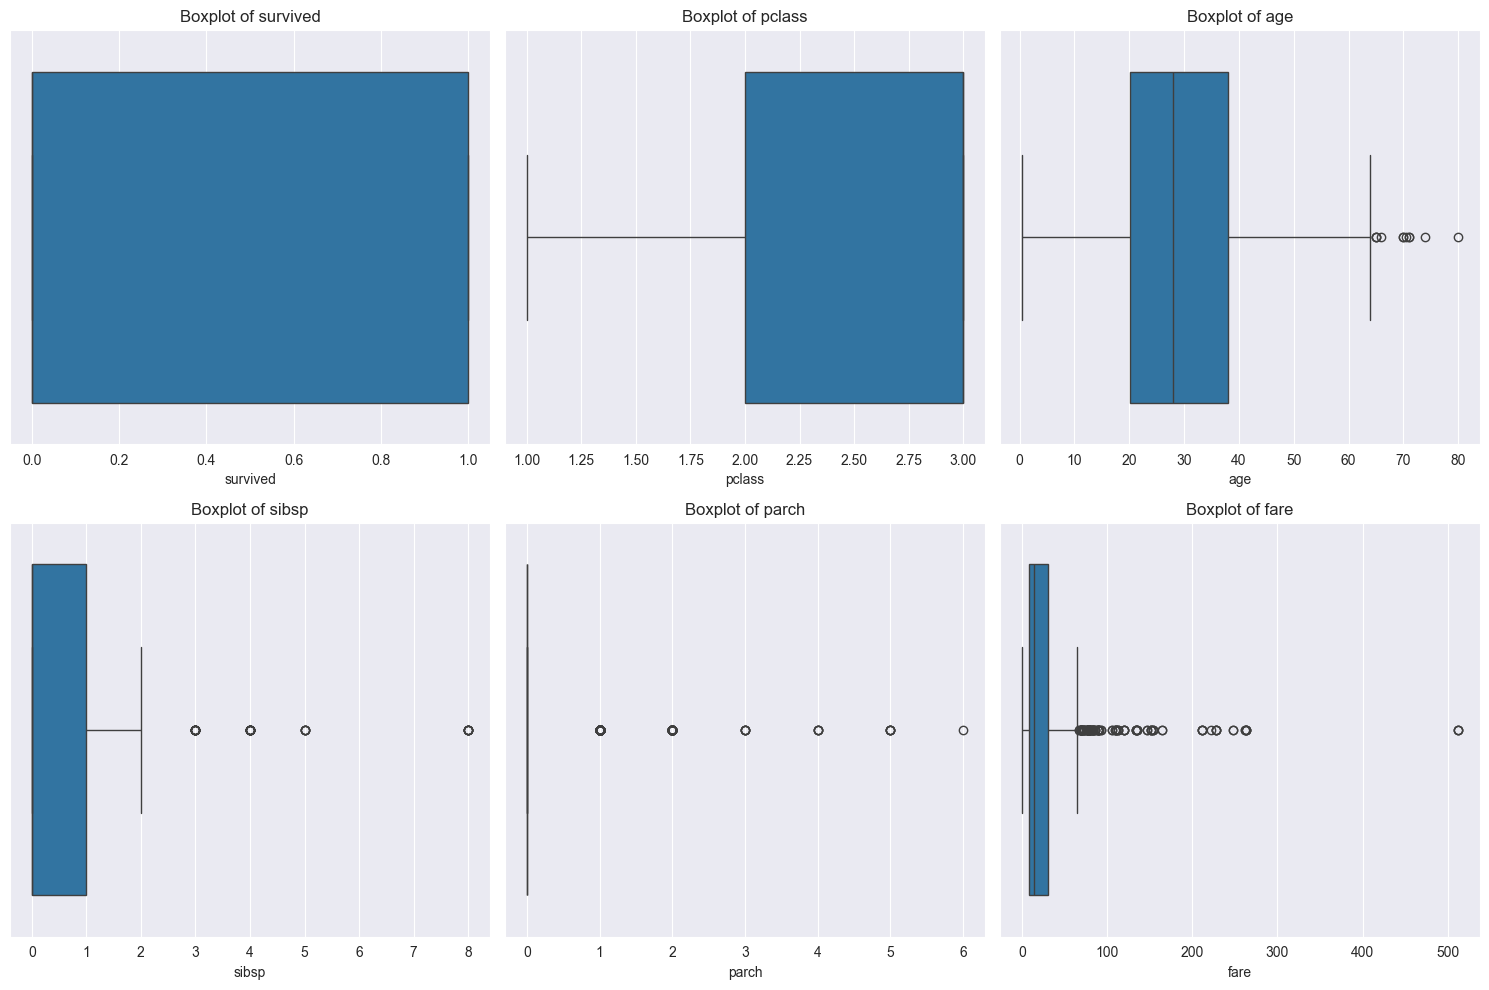

In [13]:
# Set the overall figure size for all boxplots
plt.figure(figsize=(15, 10))

# Loop through each numerical column to create a boxplot
for i, col in enumerate(numerical_cols):
    # Create a subplot for each column (2 rows x 3 columns layout)
    plt.subplot(2, 3, i + 1)

    # Draw the boxplot for the current column
    sns.boxplot(data=dataset, x=col)

    # Set the title for the subplot
    plt.title(f'Boxplot of {col}')

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [14]:
# Print the number of unique (distinct) values in each column
print(dataset.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


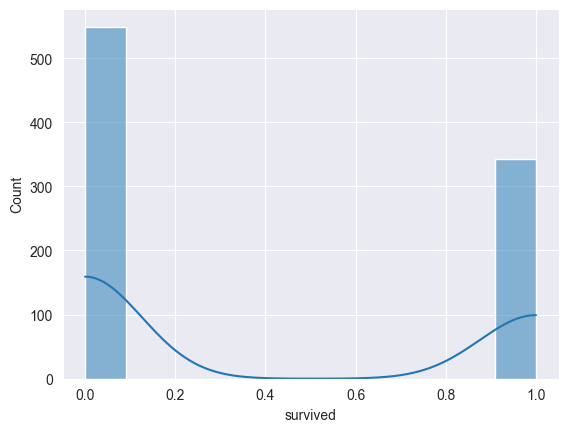

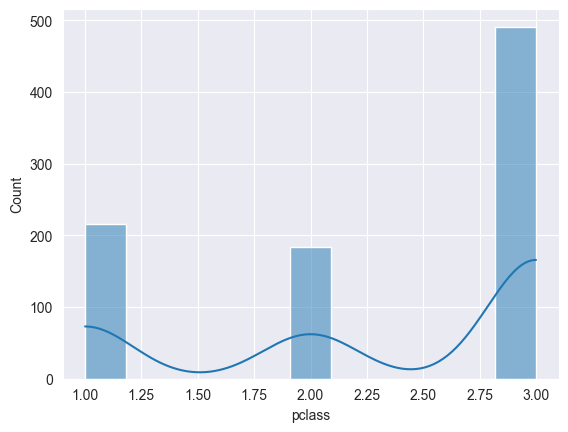

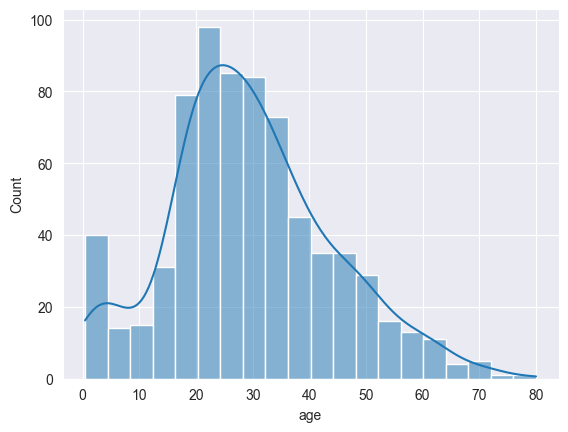

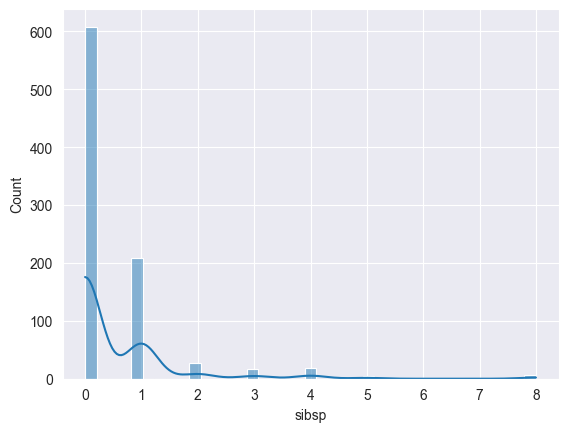

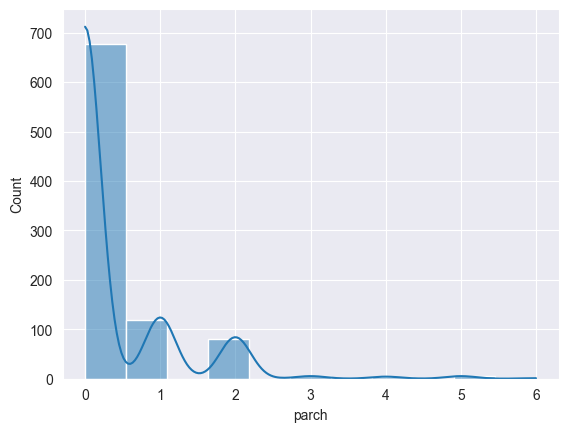

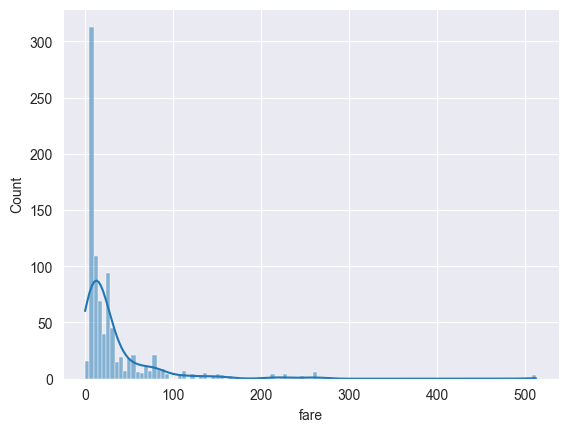

In [15]:
# Loop through all columns in the dataset that have numeric data types (int64 or float64)
for col in dataset.select_dtypes(include=['int64', 'float64']).columns:
    # Create a histogram plot for the current numeric column
    sns.histplot(dataset[col] , kde=True )
    # Display the plot
    plt.show()



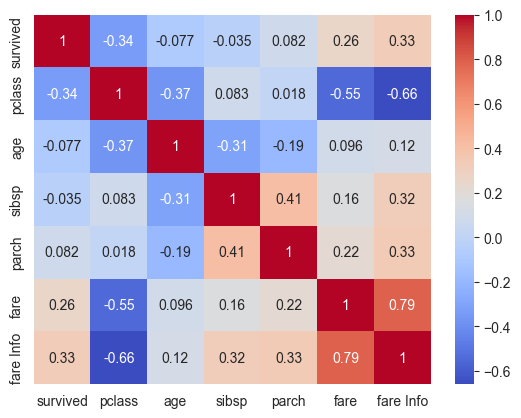

In [32]:
# Correlation heatmap with only numeric columns
corr = dataset.select_dtypes(include=['int64', 'float64']).corr()

# Create a heatmap to visualize the correlation matrix
# - annot=True shows the correlation values inside the boxes
# - cmap='coolwarm' gives a color gradient from cool (blue) to warm (red)
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


In [17]:
# View available columns
print(dataset.columns)

# Try the correct casing
print(dataset['fare'].skew())
print(dataset['fare'].kurt())


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
4.787316519674893
33.39814088089868


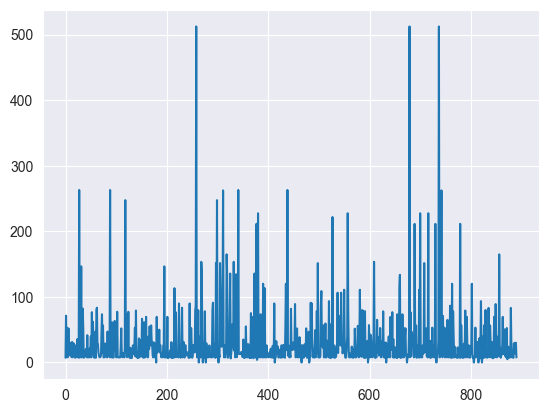

In [18]:
plt.plot(dataset['fare'])

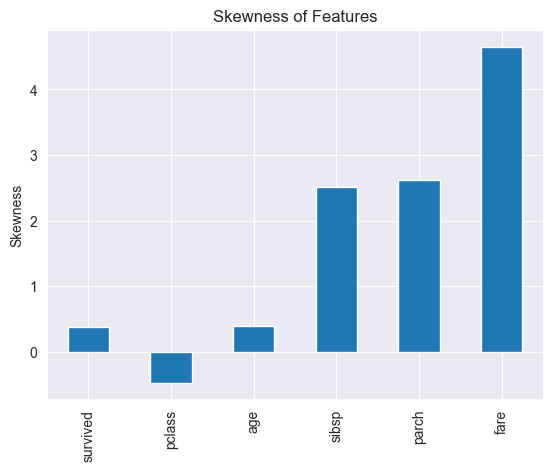

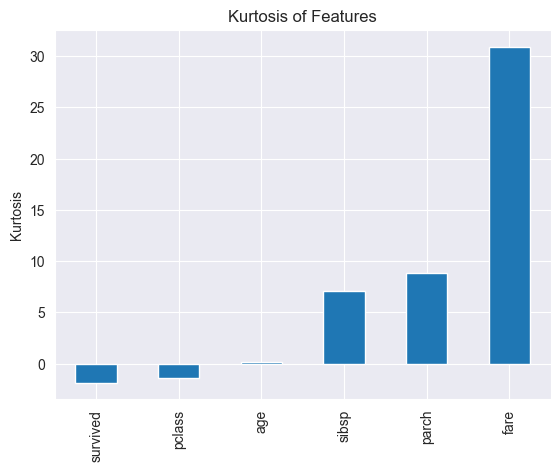

In [19]:


# Ensure only numeric columns are selected and NaNs are handled
numeric_data = dataset.select_dtypes(include=['int64', 'float64']).dropna()

# Select only numeric columns (integers and floats) and drop rows with missing values (NaNs)
numeric_data.skew().plot(kind='bar', title='Skewness of Features')
plt.ylabel("Skewness")
plt.show()

# Calculate kurtosis for each numeric feature and plot it as a bar chart
numeric_data.kurt().plot(kind='bar', title='Kurtosis of Features')
# Add label to the y-axis
plt.ylabel("Kurtosis")
# Show the plot
plt.show()



sex
male      577
female    314
Name: count, dtype: int64


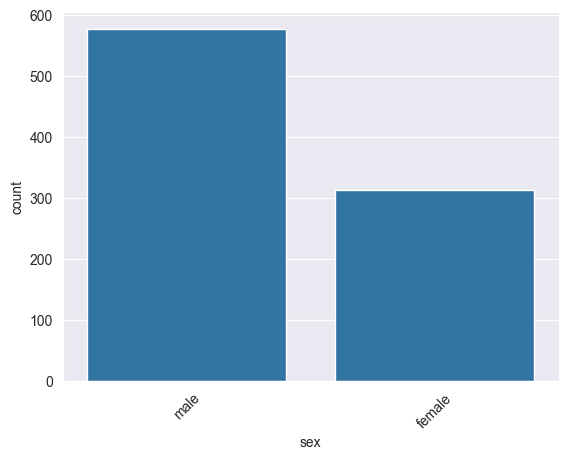

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


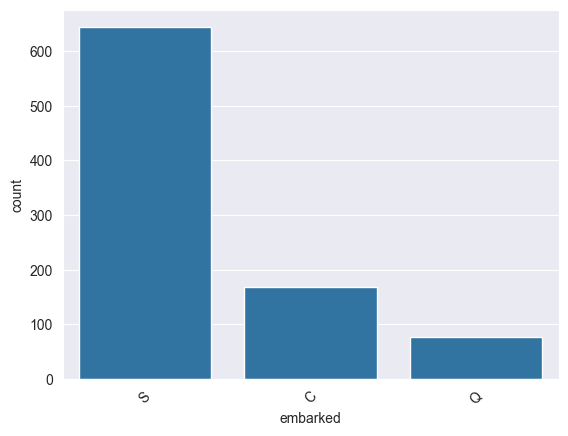

who
man      537
woman    271
child     83
Name: count, dtype: int64


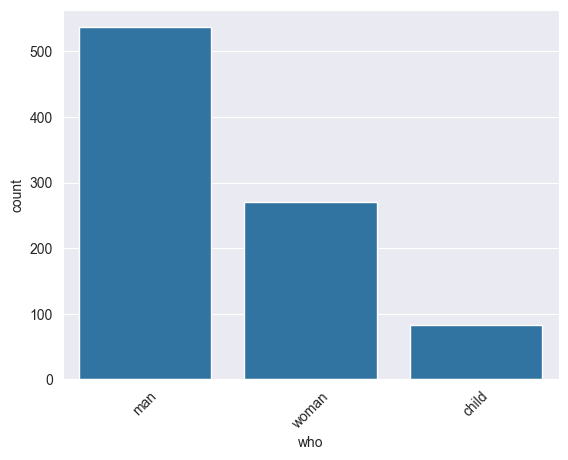

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


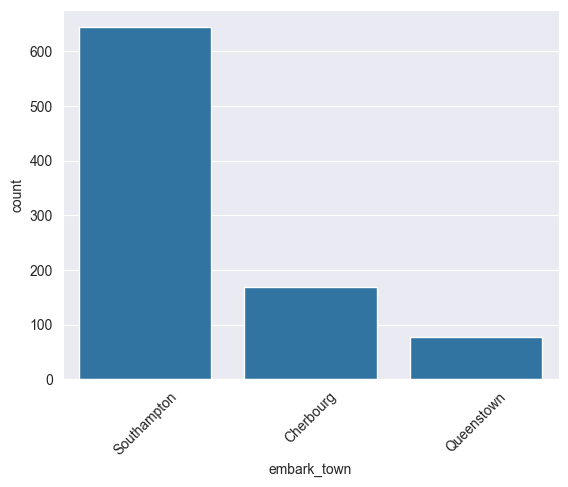

alive
no     549
yes    342
Name: count, dtype: int64


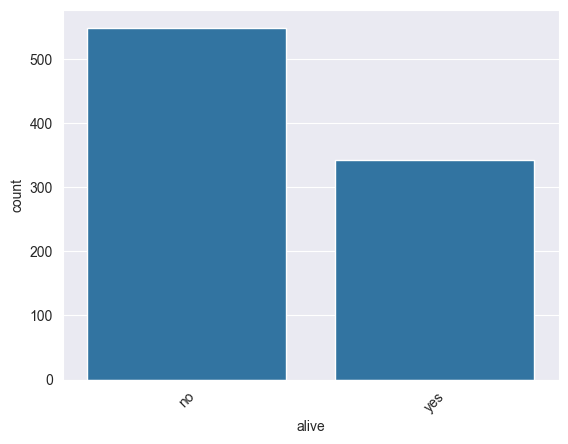

In [20]:
# Loop through all columns with data type 'object' (i.e., categorical columns)
for col in dataset.select_dtypes(include=['object']).columns:
  # Print the frequency/count of each unique value in the categorical column
    print(dataset[col].value_counts())
   # Create a count plot (bar chart) for the column
    sns.countplot(x=col, data=dataset)
   # Rotate x-axis labels by 45 degrees for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


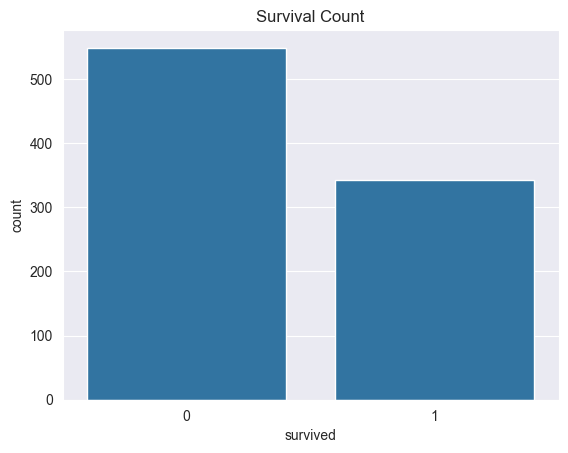

In [21]:
# Create a count plot of the 'survived' column to show the number of survivors vs. non-survivors
sns.countplot(x='survived', data=dataset)
# Add a title to the plot
plt.title("Survival Count")

# Display the plot
plt.show()


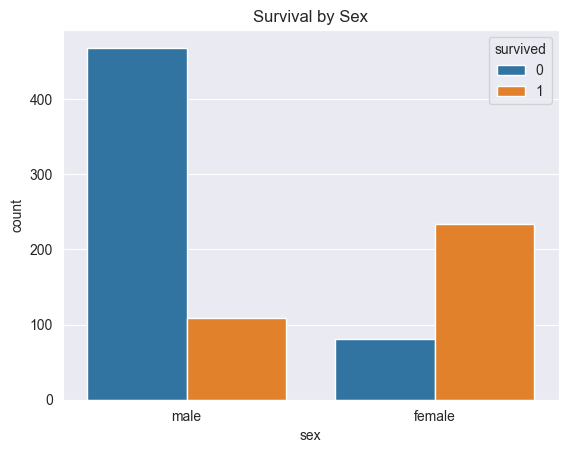

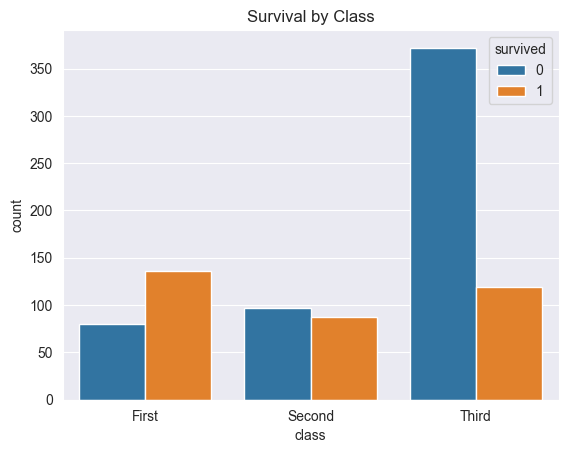

In [22]:
# Count plot to show survival distribution based on passenger sex
# hue='survived' adds a secondary category (survived or not) represented by different colors
sns.countplot(x='sex', hue='survived', data=dataset)
# Title of the plot
plt.title("Survival by Sex")
# Display the plot
plt.show()

# Count plot to show survival distribution based on passenger class
# Again, hue='survived' splits the bars into survived (1) and not survived (0)

sns.countplot(x='class', hue='survived', data=dataset)
# Title of the plot
plt.title("Survival by Class")

# Display the plot
plt.show()


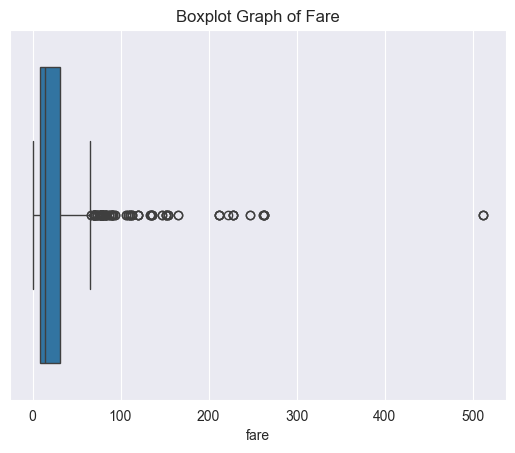

In [23]:
# Create a boxplot for the 'fare' column to visualize its distribution and detect outliers
sns.boxplot(x=dataset['fare'])

# Add a title to the plot
plt.title("Boxplot Graph of Fare")

# Display the plot

plt.show()


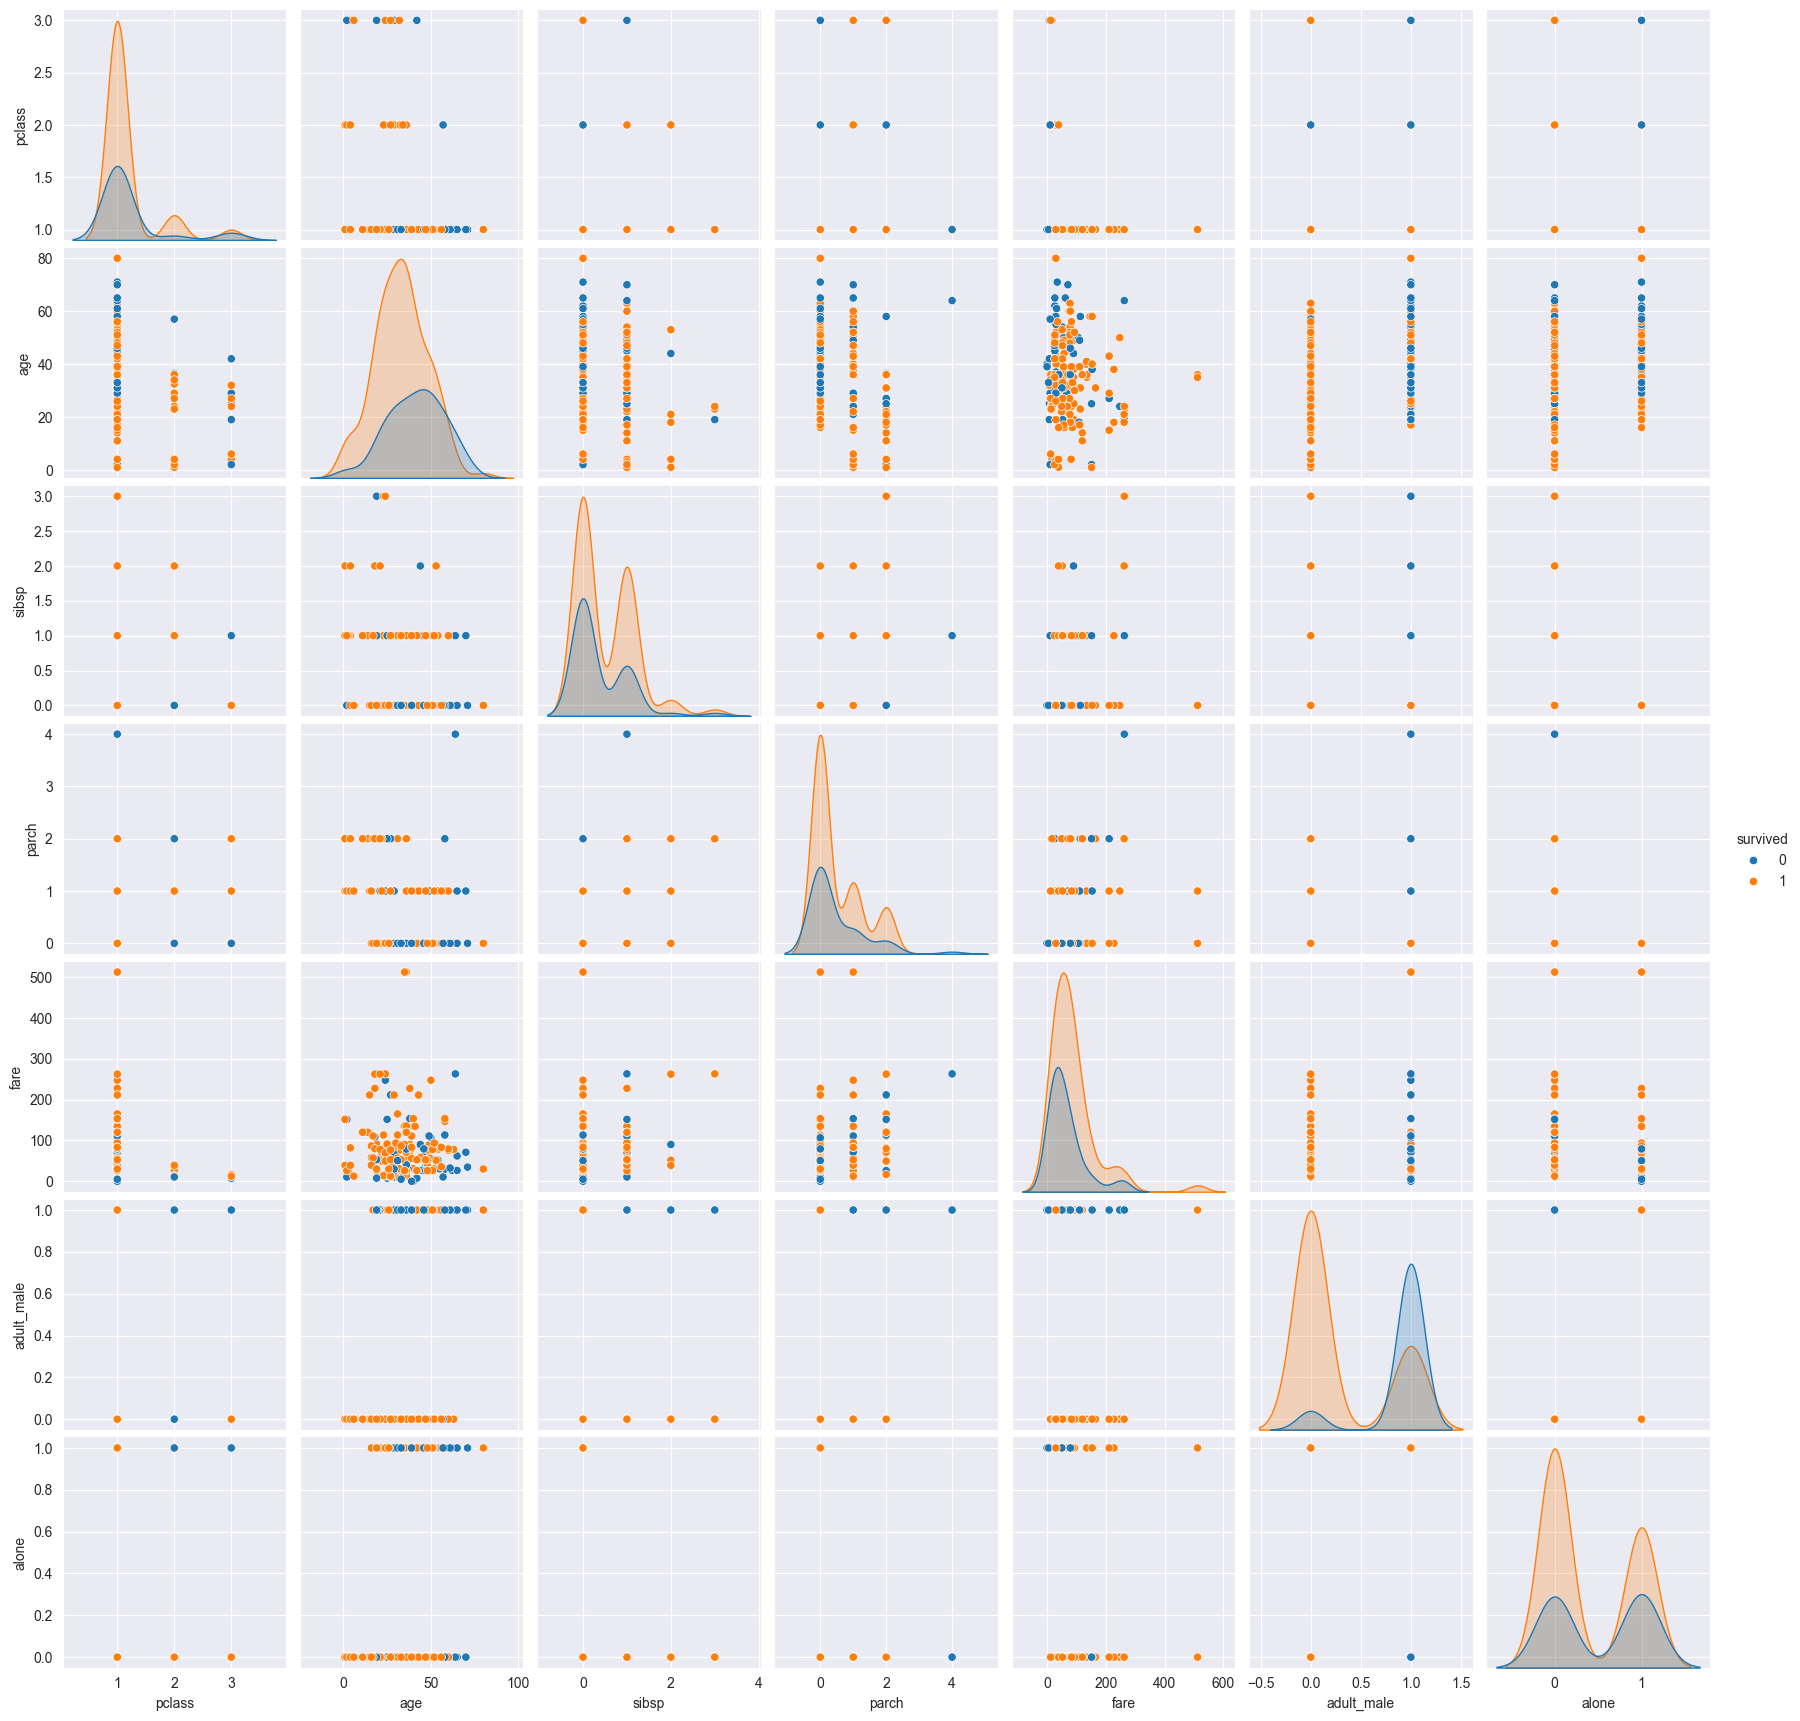

In [24]:
# Create a pair plot of all numerical features in the dataset (after dropping rows with missing values)
# Color the points based on the 'survived' column (hue)
# Use KDE (Kernel Density Estimate) plots on the diagonals instead of histograms
sns.pairplot(dataset.dropna(), hue='survived', diag_kind='kde')


In [25]:
# Group the dataset by 'sex' and calculate the mean age for each gender
print(dataset.groupby('sex')['age'].mean())
# Group the dataset by 'class' and calculate the median fare for each passenger class (1st, 2nd, 3rd)
print(dataset.groupby('class')['fare'].median())


sex
female    27.915709
male      30.726645
Name: age, dtype: float64
class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64


C:\Users\rahul\AppData\Local\Temp\ipykernel_876\2559134738.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby('class')['fare'].median())


<Axes: >

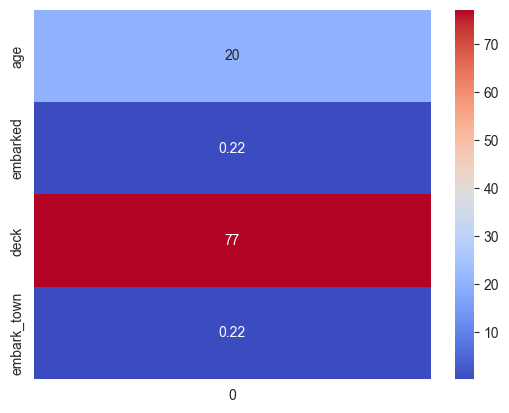

In [26]:
# Calculate the percentage of missing (null) values in each column
null_percentage = dataset.isnull().mean() * 100
# Filter out only those columns which have missing values (> 0%)
# Convert the resulting Series into a DataFrame for better heatmap display
sns.heatmap(null_percentage[null_percentage > 0].to_frame(), annot=True, cmap="coolwarm")


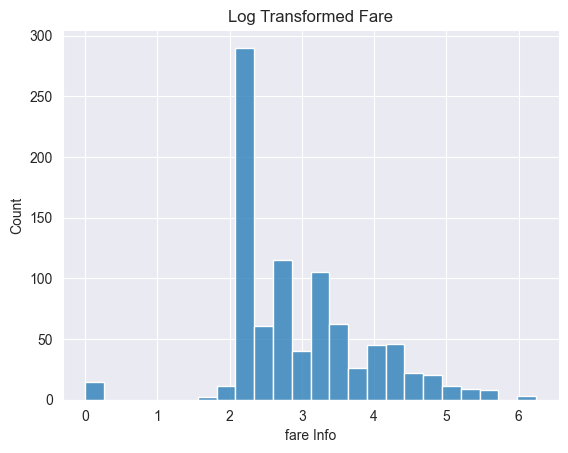

In [27]:
# Apply log transformation to the 'fare' column to reduce skewness and handle large variations
# np.log1p(x) computes log(1 + x), which is safer for values close to 0
dataset['fare Info'] = np.log1p(dataset['fare'])
# Plot the distribution of the transformed 'fare Info' column using a histogram
sns.histplot(dataset['fare Info'])
# Add a title to the plot
plt.title("Log Transformed Fare")
# Display the plot
plt.show()
